In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)
sub = pd.read_csv('sample_submission.csv', index_col = 0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 785 entries, label to px784
dtypes: int64(785)
memory usage: 359.8 MB


In [4]:
train_label = train['label']
train_px = train.drop('label',axis = 1)

In [5]:
train_px = train_px.to_numpy()
train_px = train_px.reshape(-1,1, 28, 28)

In [6]:
test = test.to_numpy()
test = test.reshape(-1,1, 28, 28)

In [7]:
sub = sub['label'].to_numpy()

In [8]:
train_px.shape

(60000, 1, 28, 28)

In [9]:
import matplotlib.pyplot as plt

---

# 파이토치

In [10]:
import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torchvision.datasets as datasets

In [11]:
# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
train_label.shape

(60000,)

In [13]:
# 텐서 변환(GPU)
train_px = torch.Tensor(train_px)
train_label = torch.LongTensor(train_label)
test_px = torch.Tensor(test)
test_label = torch.LongTensor(sub)

In [14]:
# 데이터셋 정의
train = TensorDataset(train_px, train_label)
train_loader = DataLoader(train, batch_size=64, shuffle=True)

test = TensorDataset(test_px, test_label)
test_loader = DataLoader(test, batch_size=64, shuffle=True)

In [15]:
# 공통 함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# 공통 함수 불러오기
from pythonlibs.torch_lib1 import *

fatal: destination path 'pythonlibs' already exists and is not an empty directory.


In [16]:
# 사전 학습 모델 불러오기
# pretraind = True로 학습을 마친 파라미터를 동시에 불러오기
from torchvision import models
net = models.resnet50(pretrained = True)

C:\Users\lmj\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\lmj\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

기존 모델은 out_features가 1000이다  
이를 10개로 바꿔줘야함

In [18]:
fc_in_features = net.fc.in_features

# 최종 레이어 함수 교체
net.fc = nn.Linear(fc_in_features, 10)

In [19]:
# 모델 입력이 RGB 3차원이 아니기 때문에 1차원으로 변경
net.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [20]:
print(net)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
# GPU 모델 설정
net = net.to(device)

In [25]:
lr = 0.001
criterion = nn.CrossEntropyLoss().to(device) # 손실함수
optimizer = optim.Adam(net.parameters(), lr = 0.01)
history = np.zeros((0, 5))

In [26]:
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # 훈련 페이즈
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 경사 초기화
            optimizer.zero_grad()

            # 예측 함수
            outputs = net(inputs)

            # 손실 함수
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 경사 계산
            loss.backward()

            # 파라미터 수정
            optimizer.step()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            train_acc += (predicted == labels).sum().item()

            # 손실과 정확도 계산
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # 예측 페이즈
        net.eval()
        count = 0
        result = []

        for inputs, labels in test_loader:
            count += len(labels)

            inputs = inputs.to(device)
            labels = labels.to(device)

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]
            result.append(predicted)

            # 정답 건수 산출
            val_acc += (predicted == labels).sum().item()

            # 손실과 정확도 계산
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
        
    return history, result

In [27]:
num_epochs = 10
history, result = fit(net, optimizer, criterion, num_epochs, 
          train_loader, test_loader, device, history)

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.00233 acc: 0.95532 val_loss: 0.00097, val_acc: 0.98300


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.00370 acc: 0.93938 val_loss: 0.00172, val_acc: 0.96570


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.00148 acc: 0.97053 val_loss: 0.00087, val_acc: 0.98240


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.00101 acc: 0.98030 val_loss: 0.00088, val_acc: 0.98420


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.00094 acc: 0.98138 val_loss: 0.00087, val_acc: 0.98280


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.00173 acc: 0.97045 val_loss: 0.00072, val_acc: 0.98520


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.00080 acc: 0.98452 val_loss: 0.00069, val_acc: 0.98590


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.00069 acc: 0.98655 val_loss: 0.00071, val_acc: 0.98640


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.00070 acc: 0.98630 val_loss: 0.00067, val_acc: 0.98660


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.00059 acc: 0.98840 val_loss: 0.00075, val_acc: 0.98470


초기상태 : 손실 : 0.00097  정확도 : 0.98300
최종상태 : 손실 : 0.00075 정확도 : 0.98470


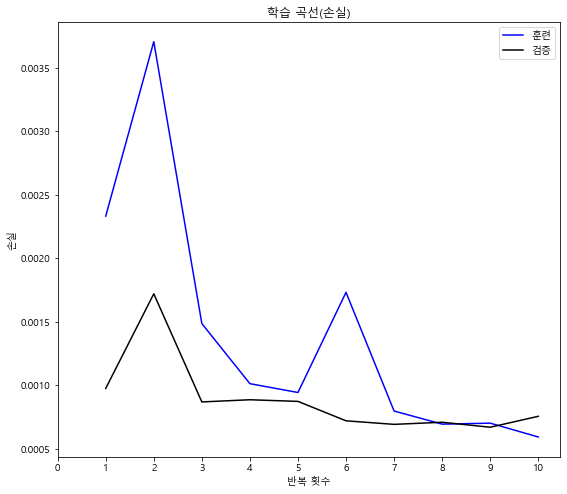

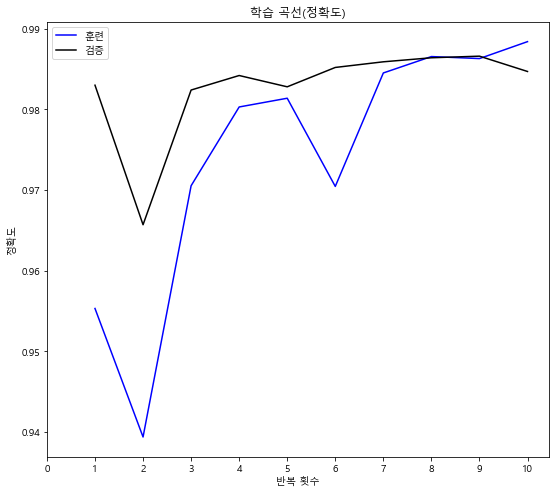

In [32]:
# 결과 요약
evaluate_history(history)

그래프를 보면 epoch = 9일때 가장 결과가 좋았을것으로 예상됨

In [35]:
with torch.no_grad():
    outputs = net(test_px.to(device))
    predicted = torch.max(outputs, 1)[1]

RuntimeError: CUDA out of memory. Tried to allocate 480.00 MiB (GPU 0; 2.00 GiB total capacity; 992.30 MiB already allocated; 0 bytes free; 1.53 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

결과를 제출해보려고 prediction 해봤는데.. 컴퓨터가 구져서 out of memory가 떴다..